In [60]:
import numpy as np
import pandas as pd
import time

In [61]:
data = pd.read_csv('Social_Network_Ads.csv')

In [62]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [63]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [64]:
data = data[['Age','EstimatedSalary','Purchased']]

In [65]:
X = data.iloc[:,0:2]
y = data.iloc[:,-1]

In [66]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [68]:
X_scaled

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [69]:
X_scaled.shape

(400, 2)

In [70]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [71]:
model = Sequential()
model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [72]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [88]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
# If batch size is 1 then it is Sochastic Gradient Descent
# if batch size is equal to the shape then it is Batch Gradient Descent
# if batch is divided then it is Mini Batch Gradient Descent
history = model.fit(X_scaled,y,epochs=100,batch_size=1,validation_split=0.2)
start = time.time()
print(time.time()-start)


Epoch 1/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9205 - loss: 0.1991 - val_accuracy: 0.9375 - val_loss: 0.2432
Epoch 2/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9207 - loss: 0.2091 - val_accuracy: 0.9500 - val_loss: 0.2324
Epoch 3/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9141 - loss: 0.2136 - val_accuracy: 0.9500 - val_loss: 0.2314
Epoch 4/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9079 - loss: 0.2174 - val_accuracy: 0.9500 - val_loss: 0.2248
Epoch 5/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9124 - loss: 0.2018 - val_accuracy: 0.9500 - val_loss: 0.2280
Epoch 6/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9308 - loss: 0.1865 - val_accuracy: 0.9500 - val_loss: 0.2290
Epoch 7/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8988 - loss: 0.2304 - val_accuracy: 0.9500 - val_loss: 0.2316
Epoch 8/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9260 - loss: 0.1957 - val_accu

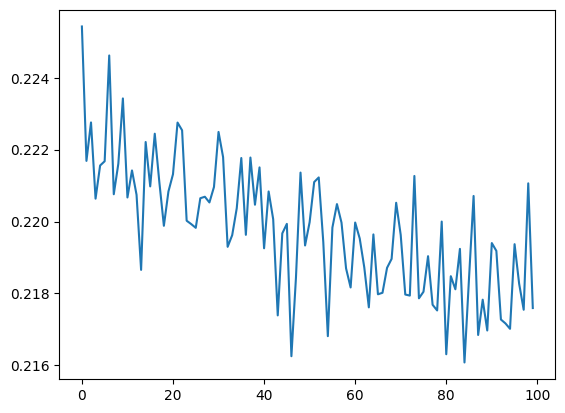

In [90]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [75]:
model1 = Sequential()
model1.add(Dense(10,activation='relu',input_dim=2))
model1.add(Dense(10,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

In [86]:
model1.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_scaled,y,epochs=100,batch_size=200,validation_split=0.2)
start = time.time()
print(time.time()-start)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.9075 - loss: 0.2125 - val_accuracy: 0.9500 - val_loss: 0.2324
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9108 - loss: 0.2073 - val_accuracy: 0.9500 - val_loss: 0.2325
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9108 - loss: 0.2113 - val_accuracy: 0.9500 - val_loss: 0.2325
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9042 - loss: 0.2151 - val_accuracy: 0.9500 - val_loss: 0.2326
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9025 - loss: 0.2182 - val_accuracy: 0.9500 - val_loss: 0.2327
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9092 - loss: 0.2159 - val_accuracy: 0.9500 - val_loss: 0.2327
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9042 - loss: 0.2243 - val_accuracy: 0.9500 - val_loss: 0.2328
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9025 - loss: 0.2222 - val_accuracy: 0.9500 - val_loss

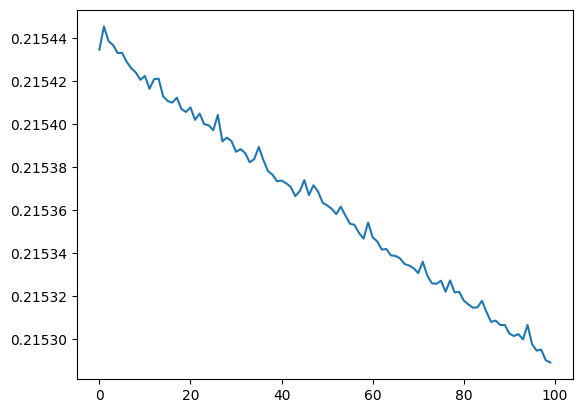

In [87]:
plt.plot(history.history['loss'])